In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ee06efa0b5c726075200f6e6412ff98


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | meyungs
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | pokrovskoye
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | roald
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | benguela
Processing Record 15 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | hermanu

Processing Record 39 of Set 4 | mackay
Processing Record 40 of Set 4 | kaele
Processing Record 41 of Set 4 | viligili
City not found. Skipping...
Processing Record 42 of Set 4 | soyo
Processing Record 43 of Set 4 | yaan
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | shenkursk
Processing Record 46 of Set 4 | rio viejo
Processing Record 47 of Set 4 | kutum
Processing Record 48 of Set 4 | shimoda
Processing Record 49 of Set 4 | aswan
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | saint-joseph
Processing Record 4 of Set 5 | creel
Processing Record 5 of Set 5 | daru
Processing Record 6 of Set 5 | thanatpin
Processing Record 7 of Set 5 | anloga
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | alice
Processing Record 10 of Set 5 | richards bay
Processing Record 11 of Set 5 | khonuu
City not found. Skipping...
Pro

Processing Record 29 of Set 8 | atasu
Processing Record 30 of Set 8 | fare
Processing Record 31 of Set 8 | gori
Processing Record 32 of Set 8 | sao jose da coroa grande
Processing Record 33 of Set 8 | acapulco
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | karratha
Processing Record 36 of Set 8 | cabedelo
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | jiaonan
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | lazaro cardenas
Processing Record 41 of Set 8 | moindou
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | quatre cocos
Processing Record 44 of Set 8 | barras
Processing Record 45 of Set 8 | vitoria
Processing Record 46 of Set 8 | dharchula
Processing Record 47 of Set 8 | san andres
Processing Record 48 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 49 of Set 8 | santa cruz del sur
Processing Record 50 of Set 8 | jacmel
Processing Record 1 of Set 9 | darasun
Processing R

Processing Record 18 of Set 12 | rognan
Processing Record 19 of Set 12 | ponta delgada
Processing Record 20 of Set 12 | dosso
Processing Record 21 of Set 12 | caidian
Processing Record 22 of Set 12 | ust-tsilma
Processing Record 23 of Set 12 | axim
Processing Record 24 of Set 12 | bargal
City not found. Skipping...
Processing Record 25 of Set 12 | najran
Processing Record 26 of Set 12 | ahwa
Processing Record 27 of Set 12 | pangnirtung
Processing Record 28 of Set 12 | mangai
Processing Record 29 of Set 12 | vidisha
Processing Record 30 of Set 12 | the pas
Processing Record 31 of Set 12 | kant
Processing Record 32 of Set 12 | virginia beach
Processing Record 33 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 12 | jeremie
Processing Record 35 of Set 12 | podporozhye
Processing Record 36 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 37 of Set 12 | alcala la real
Processing Record 38 of Set 12 | merauke
Processing Record 39 of Set 12 | sa

In [15]:
len(city_data)

576

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.20,79,20,11.50,TO,2021-03-29 02:12:23
1,San Patricio,28.0170,-97.5169,62.60,67,90,12.66,US,2021-03-29 02:12:24
2,Punta Arenas,-53.1500,-70.9167,39.20,75,0,5.75,CL,2021-03-29 02:12:24
3,Pokrovskoye,47.4157,38.8971,39.83,86,98,5.37,RU,2021-03-29 02:12:24
4,Hasaki,35.7333,140.8333,68.00,82,75,3.44,JP,2021-03-29 02:12:25
5,Roald,62.5833,6.1333,44.60,57,90,11.50,NO,2021-03-29 02:12:26
6,Touros,-5.1989,-35.4608,78.80,89,75,4.61,BR,2021-03-29 02:12:26
7,Rikitea,-23.1203,-134.9692,79.75,71,1,15.05,PF,2021-03-29 02:12:26
8,Talnakh,69.4865,88.3972,-8.81,98,97,6.42,RU,2021-03-29 02:12:27
9,Nome,64.5011,-165.4064,24.80,86,90,19.57,US,2021-03-29 02:12:27


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-03-29 02:12:23,-21.2000,-175.2000,84.20,79,20,11.50
1,San Patricio,US,2021-03-29 02:12:24,28.0170,-97.5169,62.60,67,90,12.66
2,Punta Arenas,CL,2021-03-29 02:12:24,-53.1500,-70.9167,39.20,75,0,5.75
3,Pokrovskoye,RU,2021-03-29 02:12:24,47.4157,38.8971,39.83,86,98,5.37
4,Hasaki,JP,2021-03-29 02:12:25,35.7333,140.8333,68.00,82,75,3.44
...,...,...,...,...,...,...,...,...,...
571,Sohag,EG,2021-03-29 02:16:12,26.5570,31.6948,57.20,51,0,16.11
572,Geraldton,AU,2021-03-29 02:16:13,-28.7667,114.6000,91.40,27,0,3.44
573,Port Keats,AU,2021-03-29 02:16:13,-14.2500,129.5500,82.69,73,100,7.83
574,Srednekolymsk,RU,2021-03-29 02:12:15,67.4500,153.6833,6.84,84,99,6.15


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

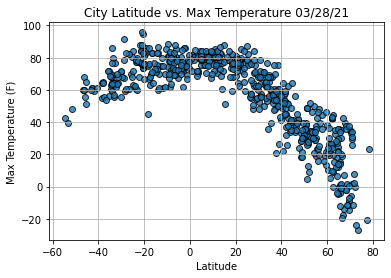

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

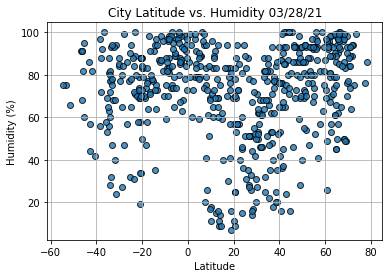

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

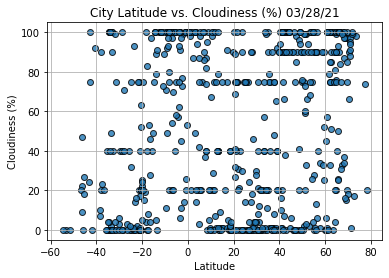

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


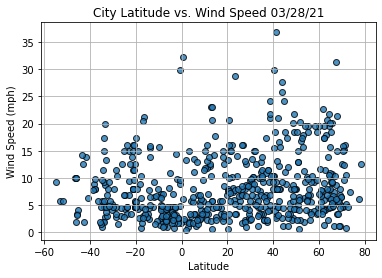

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
#loc method to access group of rows and columns from Dataframe
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2021-03-29 02:12:28
Lat                       69.4541
Lng                      -133.037
Max Temp                    -14.8
Humidity                       76
Cloudiness                     20
Wind Speed                   6.91
Name: 13, dtype: object

In [27]:
# filter DataFrame based on value of row
city_data_df["Lat"] >= 0


0      False
1       True
2      False
3       True
4       True
       ...  
571     True
572    False
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [28]:
# loc method return all data fitting criteria in Dataframe
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,San Patricio,US,2021-03-29 02:12:24,28.0170,-97.5169,62.60,67,90,12.66
3,Pokrovskoye,RU,2021-03-29 02:12:24,47.4157,38.8971,39.83,86,98,5.37
4,Hasaki,JP,2021-03-29 02:12:25,35.7333,140.8333,68.00,82,75,3.44
5,Roald,NO,2021-03-29 02:12:26,62.5833,6.1333,44.60,57,90,11.50
8,Talnakh,RU,2021-03-29 02:12:27,69.4865,88.3972,-8.81,98,97,6.42


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


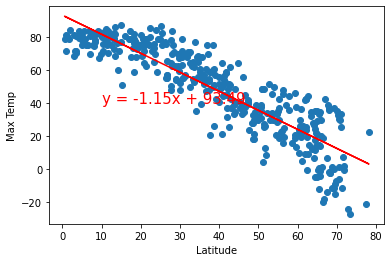

In [30]:
# Linear regression on the Northern Hemisphere for max temps
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

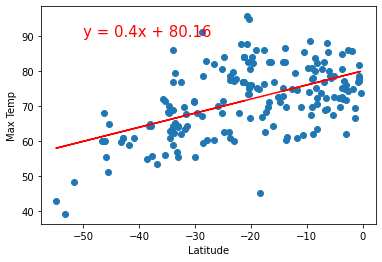

In [31]:
# Linear regression on the Southern Hemisphere max temps
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

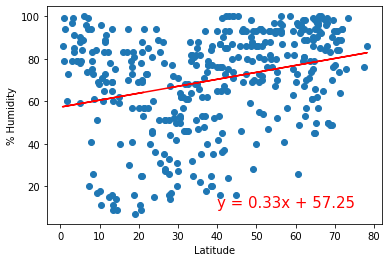

In [32]:
# Linear regression on the Northern Hemisphere % humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

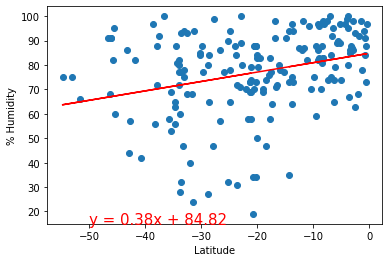

In [34]:
# Linear regression on the Southern Hemisphere % humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

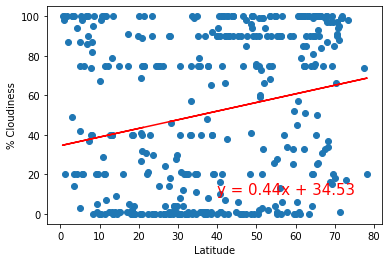

In [35]:
# Linear regression on the Northern Hemisphere % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

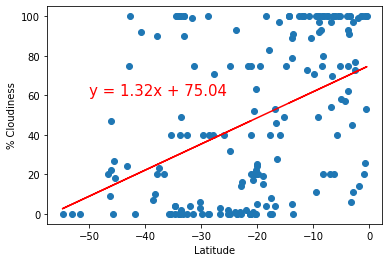

In [36]:
# Linear regression on the Southern Hemisphere % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

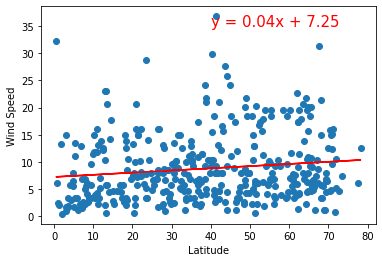

In [37]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

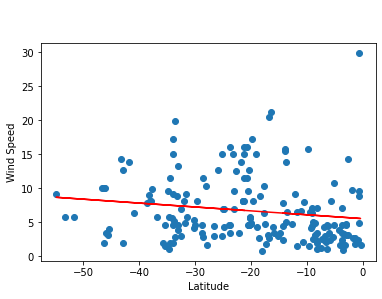

In [38]:
# Linear regression on the Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
# check r value